# K-Means Clustering

Welcome to your next lab! In this assignment you will solve problem of clustering examples from given dataset using K-Means algorithm.

**You will learn to:**
- Build the general architecture of a learning algorithm:
    - KMeans Class
        - Initializing centroids
        - Finding closest centroid for each point
        - Finding optimal centroids
    - Finding optimal value of k
        - "Elbow" method

> **Important note:** Before submission make sure that you **didn't add or delete any notebook cells**. Otherwise your work may not be accepted by the validator!

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [seaborn](https://seaborn.pydata.org/)  is a Python visualization library based on matplotlib which provides a high-level interface for drawing graphics.
- [JSAnimation](https://pypi.org/project/JSAnimation/) Javascript Animation exporter for matplotlib and IPython.
- [mpl_toolkits](https://matplotlib.org/mpl_toolkits/index.html) collections of application-specific functions that extend Matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from matplotlib import animation

## 2 - Overview of the Problem set ##

**Problem Statement**:
In this lab we will work with some simple synthetic dataset to see how the algorithm works. Run following cells to generate dataset:

In [ ]:
np.random.seed(37)
X = np.vstack(((np.random.randn(150, 2)  + np.array([3, 0])),
               (np.random.randn(100, 2)  + np.array([-3.5, 0.5])),
               (np.random.randn(100, 2) + np.array([-0.5, -2])),
               (np.random.randn(150, 2) + np.array([-2, -2.5])),
               (np.random.randn(150, 2) + np.array([-5.5, -3]))))

In [ ]:
print('First five examples: ', X[:5])

First five examples:  [[ 2.94553639  0.67430807]
 [ 3.34664703 -1.30034617]
 [ 4.51851188  0.98982371]
 [ 3.2776809  -0.44858935]
 [ 3.96196624 -0.82757864]]


**Expected Output**:

<table style="width:55%">
    <tr>
        <td><b>First five examples</b></td>
       <td> [[ 2.94553639  0.67430807]<br>
 [ 3.34664703 -1.30034617]<br>
 [ 4.51851188  0.98982371]<br>
 [ 3.2776809  -0.44858935]<br>
 [ 3.96196624 -0.82757864]]</td>
    </tr>
    
</table>

Our dataset represents 650 examples with 2 features:

In [ ]:
print('X.shape:', X.shape)

X.shape: (650, 2)


**Expected Output**:

<table style="width:20%">
    <tr>
        <td><b>X.shape:</b></td>
       <td>(650, 2)
    </tr>
    
</table>

## 3 - Visualisation

Let's visualise our dataset to see how it looks like:

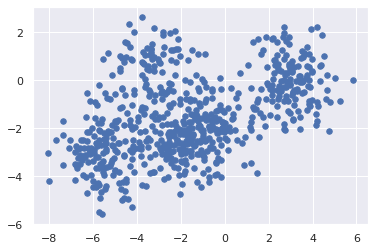

In [ ]:
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30)
ax = plt.gca()

## 4 - K-Means. General Architecture

K-Means is a very simple algorithm which clusters the data into K number of clusters. The algorithm works as follows, assuming we have inputs $x_1,x_2,x_3,…,x_n$ and value of $k$:
1. Pick $k$ random points as cluster centers called centroids
2. Assign each $x_i$ to nearest cluster by calculating its distance to each centroid
3. Find new cluster center by taking the average of the assigned points
4. Repeat Step 2 and 3 until none of the cluster assignments change


**Step 1**

We randomly pick $k$ cluster centers(centroids). Let’s assume these are $c_1,c_2,…,c_k$, and we can say that:
$$c_1,c_2,…,c_k \epsilon  C,$$ is the set of all centroids.


**Step 2**

In this step we assign each input value to closest center. This is done by calculating squared Euclidean norm of the difference between the point and the each centroid:
$$\arg \min_{c_i \in C} ||x - c_i||^2.$$


**Step 3**

Finding the new centroid by taking the average of all the points assigned to that cluster:
$$c_i = \frac{1}{\lvert S_i \rvert}\sum_{x_i \in S_i} x_i,$$

$S_i$ is the set of all points assigned to the $i_{th}$ cluster.


**Step 4**

Repeating *Step 2* and *Step 3* until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.

In [ ]:
# GRADED CLASS: KMeans

class KMeans(object):
    """
    Parameters:
    -----------
    X -- np.array
        Matrix of input features
    k -- int
        Number of clusters
    """

    def __init__(self, X, k):
        self.X = X
        self.k = k

    def initialize_centroids(self):
        """
        Returns:

        Array of shape (k, n_features),
            containing k centroids from the initial points
        """

        ### START CODE HERE ###
        # use shuffle with random state = 512, and pick first k points
        np.random.seed(512)
        x_copy = np.copy(self.X)
        np.random.shuffle(x_copy)
        return x_copy[: self.k]
        ### END CODE HERE ###

    def closest_centroid(self, centroids):
        """
        Returns:

        Array of shape (n_examples, ),
            containing index of the nearest centroid for each point
        """

        ### START CODE HERE ###c
        n_examples = self.X.shape[0]
        closest = []
        for i in range(n_examples):
          check = []
          for j in range(centroids.shape[0]):
            check.append(np.linalg.norm(self.X[i] - centroids[j])**2)
          closest.append(np.argmin(check))
        return np.array(closest)

        ### END CODE HERE ###

    def move_centroids(self, centroids):
        """
        Returns:

        Array of shape (n_clusters, n_features),
        containing the new centroids assigned from the points closest to them
        """

        ### START CODE HERE ###
        closest = self.closest_centroid(centroids)
        new_centroids = []
        unique = np.unique(closest)

        for i in unique:
          idx = np.where(closest == i)
          c = self.X[idx].mean(axis = 0)
          new_centroids.append(c)

        return np.array(new_centroids)
        ### END CODE HERE ###


    def final_centroids(self):
        """
        Returns:

        clusters -- list of arrays, containing points of each cluster
        centroids -- array of shape (n_clusters, n_features),
            containing final centroids

        """

        ### START CODE HERE ###
        centroids_before_step = self.initialize_centroids()
        while True:
          centroids_after_step = self.move_centroids(centroids_before_step)
          if np.array_equal(centroids_after_step, centroids_before_step):
            centroids = centroids_after_step
            break
          else:
            centroids_before_step = centroids_after_step

        clusters = []
        closest = self.closest_centroid(centroids)
        unique = np.unique(closest)

        for i in unique:
          idx = np.where(closest == i)
          c = self.X[idx]
          clusters.append(c)

        clusters = np.array(clusters)
        ### END CODE HERE ###

        return clusters, centroids

**Initializing our model:**

In [ ]:
model = KMeans(X, 3)

**Initializing centroids:**

In [ ]:
centroids = model.initialize_centroids()
print('Random centroids:', centroids)

Random centroids: [[-1.40039209 -2.75287814]
 [-1.63504004 -2.59016237]
 [ 2.26881985  0.83999591]]


**Expected Output**:

<table style="width:40%">
    <tr>
        <td><b>Random centroids:</b></td>
        <td> [[-1.40039209 -2.75287814]<br>
 [-1.63504004 -2.59016237]<br>
 [ 2.26881985  0.83999591]] </td>     
    </tr>
</table>

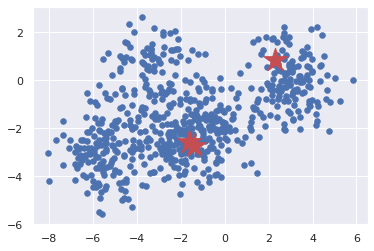

In [ ]:
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Finding closest centroids:**

In [ ]:
closest = model.closest_centroid(centroids)
print('Closest centroids:', closest[:10])

Closest centroids: [2 2 2 2 2 2 2 2 2 2]


**Expected Output**:

<table style="width:45%">
    <tr>
        <td><b>Closest:</b></td>
       <td>  [2 2 2 2 2 2 2 2 2 2] </td>
    </tr>
    
   
</table>

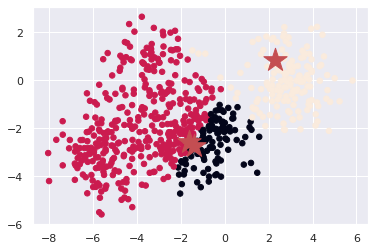

In [ ]:
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30, c=closest)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Move centroids:**

In [ ]:
next_centroids = model.move_centroids(centroids)
print('Next centroids:', next_centroids)

Next centroids: [[-0.52555543 -2.61409225]
 [-3.77584338 -1.83022158]
 [ 2.83673723 -0.03476791]]


**Expected Output**:

<table style="width:45%">
    <tr>
        <td style="width:15%"><b>Final centroids:</b></td>
       <td>  [[-0.52555543 -2.61409225]<br>
 [-3.77584338 -1.83022158]<br>
 [ 2.83673723 -0.03476791]]</td>
    </tr>
</table>

In [ ]:
clusters, final_centrs = model.final_centroids()
print('Final centroids:', final_centrs)
print('Clusters points:', clusters[0][0], clusters[1][0], clusters[2][0])

Final centroids: [[-1.78766936 -1.54395138]
 [-5.31097327 -2.7087451 ]
 [ 2.92388133 -0.10237201]]
Clusters points: [-2.85012507 -0.77129955] [-5.73089369 -0.18855257] [2.94553639 0.67430807]


<ipython-input-5-ac46c31dbeb7>:104: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


**Expected Output**:

<table style="width:45%">
    <tr>
        <td style="width:15%"><b>Final centroids:</b></td>
       <td>  [[-1.78766936 -1.54395138]<br>
 [-5.31097327 -2.7087451 ]<br>
 [ 2.92388133 -0.10237201]]</td>
    </tr>
    <tr>
        <td><b>Clusters points:</b></td>
       <td>  [-2.85012507 -0.77129955]<br>
             [-5.73089369 -0.18855257]<br>
             [ 2.94553639  0.67430807]</td>
    </tr>
</table>

Now let's demonstrate performance of the algiritm:

In [ ]:
%matplotlib notebook
from IPython.display import HTML

fig = plt.figure()
ax = plt.gca()
centroids = model.initialize_centroids()
line, = ax.plot([], [], 'r*', markersize=15)

def animate(i):
    global centroids
    centroids = model.move_centroids(centroids)
    closest = model.closest_centroid(centroids)
    line.set_data(centroids[:, 0], centroids[:, 1])
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    return line

ani = animation.FuncAnimation(fig, animate, frames=15, interval=150)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5 - Finding Optimal Value of K

Now we can check if our value of k is right. Let's use "elbow" method to do this.

To find a visual “elbow” which is the optimal number of clusters, we need to calculate the average sum of squared distance between points and centroid inside of each cluster. Mathematically,
$$W_k = \frac{1}{k}\sum_{i=1}^{k} \sum_{j}^{n_s} ||x_{ij} - c_i||^2$$
Where $k$ is the number of clusters, $n_S$ is the number of points in cluster $S$.

Implement function to find $W_k$ in the cell below:

In [ ]:
# GRADED FUNCTION: mean_distances

def mean_distances(k, X):
    """
    Arguments:

    k -- int, number of clusters
    X -- np.array, matrix of input features

    Returns:

    Array of shape (k, ), containing mean of sum distances
        from centroid to each point in the cluster for k clusters
    """

    ### START CODE HERE ###
    distortions = []
    for i in range(1, k + 1):
      kmeans = KMeans(X, i)
      clusts, final_centroids = kmeans.final_centroids()
      W = 0
      for j in range(len(clusts)):
        W +=  1/i * (np.linalg.norm(clusts[j] - final_centroids[j]) ** 2)
      distortions.append(W)

    return np.array(distortions)
    ### END CODE HERE ###


In [ ]:
print('Mean distances: ', mean_distances(10, X))

<ipython-input-5-ac46c31dbeb7>:104: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


Mean distances:  [8350.90848673 1755.47187315  685.22919558  322.6593165   232.80018991
  160.19202207  126.99851263  101.4422168    77.38601548   64.55960047]


**Expected Output**:

<table style="width:40%">
    <tr>
        <td><b>Mean distances:</b></td>
       <td>[ 8350.90848673<br>1755.47187315<br>685.22919558<br>322.6593165<br>232.80018991<br>160.19202207<br>126.99851263<br>101.4422168<br>77.38601548<br>64.55960047]</td>
    </tr>
</table>

Let's plot the results:

<ipython-input-6-871dd7b5134c>:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


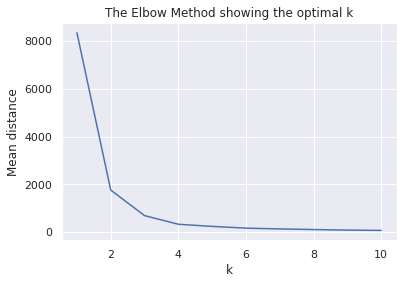

In [ ]:
%matplotlib inline

k_clusters = range(1, 11)
distances = mean_distances(10, X)
plt.plot(k_clusters, distances)
plt.xlabel('k')
plt.ylabel('Mean distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The plot shows that 3 is optimal value of k. But now we can also check performance of the algorithm with another values:

In [ ]:
%matplotlib notebook
from IPython.display import HTML

model_new = KMeans(X, 4)
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = model_new.initialize_centroids()

line1, = ax.plot([], [], 'o')
line2, = ax.plot([], [], 'o')

def init():

    line1.set_data([], [])
    line2.set_data([], [])
    return line1,line2

def animate(i):
    global centroids
    closest = model_new.closest_centroid(centroids)
    centroids = model_new.move_centroids(centroids)
    ax.cla()
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c='r', s=600)
    line1.set_data(X[:, 0] , X[:, 1])
    line2.set_data(centroids[:, 0] ,centroids[:, 1])
    return line1, line2

ani = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)

HTML(ani.to_jshtml())

## 6 - Conclusion
As we can see, our model performs the task correctly.

#### What's next:
1. Compare the results you have obtained with the `sklearn.cluster.KMeans` models.
3. Try this model in the wild! Select your favorite dataset [here](https://www.kaggle.com/datasets?sortBy=hottest&group=public&page=1&pageSize=20&size=small&filetype=all&license=all&tagids=13303) and play with it.

##### K-Means Clustering Done!

##### Make sure that you didn't add or delete any notebook cells. Otherwise your work may not be accepted by the validator!